Seasonality experimentation

In [4]:
strat_univ = ['BTCUSDT', 'ETHUSDT', 'ADAUSDT', 'BNBUSDT', 'XRPUSDT', 'DOTUSDT', 'MATICUSDT']

# Load And Structure Data

In [5]:
from binance.client import Client as bnb_client
from binance.client import BinanceAPIException
from datetime import datetime
import pandas as pd

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in strat_univ:
        try:
            px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
            print(f"Downloaded data for {coin}.")
        except BinanceAPIException:
            print(f"Couldn't load data for {coin}.")
    
    return px_data

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [6]:
data_freq = '4h'
look_back_window_size = 30 * 6
look_back_min_periods = 10 * 6
start_datetime = '2020-01-01 00:00:00'

In [7]:
px_data = get_price_data_for_universe(data_freq, start_datetime)

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for ADAUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XRPUSDT.
Downloaded data for DOTUSDT.
Downloaded data for MATICUSDT.


In [8]:
px_data

{'BTCUSDT':                                open            high             low  \
 open_time                                                             
 2020-01-01 00:00:00   7180.46000000   7238.03000000   7175.62000000   
 2020-01-01 04:00:00   7226.19000000   7231.70000000   7196.20000000   
 2020-01-01 08:00:00   7209.50000000   7231.17000000   7181.17000000   
 2020-01-01 12:00:00   7193.32000000   7244.43000000   7193.32000000   
 2020-01-01 16:00:00   7237.54000000   7245.54000000   7215.51000000   
 ...                             ...             ...             ...   
 2025-02-23 04:00:00  96408.62000000  96567.88000000  96213.10000000   
 2025-02-23 08:00:00  96560.24000000  96560.24000000  96127.75000000   
 2025-02-23 12:00:00  96221.10000000  96221.10000000  95541.22000000   
 2025-02-23 16:00:00  95541.22000000  95868.84000000  95324.42000000   
 2025-02-23 20:00:00  95773.85000000  96202.99000000  95560.12000000   
 
                               close       volume  

In [9]:
px_close = {coin: px_data[coin]["close"] for coin in px_data}
px_close = pd.DataFrame(px_close).astype(float)
px_close.index.rename("datetime", inplace=True)

px_close

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT
datetime,,,,,,,
2020-01-01 00:00:00,7230.71,130.18,0.03308,13.8159,0.19406,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.03320,13.7648,0.19518,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.03321,13.7162,0.19358,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.03357,13.7958,0.19428,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.03361,13.7270,0.19474,NaN,NaN
...,...,...,...,...,...,...,...
2025-02-23 04:00:00,96492.75,2825.63,0.78510,665.6500,2.58960,5.082,NaN
2025-02-23 08:00:00,96227.17,2795.26,0.77240,659.5000,2.56850,5.015,NaN
2025-02-23 12:00:00,95564.43,2781.81,0.76230,648.6000,2.52360,4.950,NaN


In [10]:
(365 * 5 + 2) * 6 + 31 * 6 + 18 * 6 + 3

11259

###########################################################################

Comparison of consecutive returns per week:

In [11]:
df_4h_returns = px_close / px_close.shift() - 1
df_4h_returns

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT
datetime,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.003487,0.002612,0.003628,-0.003699,0.005771,NaN,NaN
2020-01-01 08:00:00,-0.001346,0.002452,0.000301,-0.003531,-0.008198,NaN,NaN
2020-01-01 12:00:00,0.005172,0.007643,0.010840,0.005803,0.003616,NaN,NaN
2020-01-01 16:00:00,-0.001286,0.001062,0.001192,-0.004987,0.002368,NaN,NaN
...,...,...,...,...,...,...,...
2025-02-23 04:00:00,-0.000007,0.027450,0.021202,-0.000030,0.014296,0.007334,NaN
2025-02-23 08:00:00,-0.002752,-0.010748,-0.016176,-0.009239,-0.008148,-0.013184,NaN
2025-02-23 12:00:00,-0.006887,-0.004812,-0.013076,-0.016528,-0.017481,-0.012961,NaN


In [40]:
def get_interval_returns(df_returns):
    weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    #df_returns[(df_returns.index.weekday == 1) & (df_returns.index.hour == 0)].mean()

    return_data = {"mean": [], "std dev": []}
    indices = []
    for weekday in range(7):
        for hour in range(0, 24, 4):
            cross_section_data = df_returns[
                (df_returns.index.weekday == weekday) & (df_returns.index.hour == hour)]
            return_data["mean"].append(cross_section_data.mean())
            return_data["std dev"].append(cross_section_data.std())
            indices.append((weekday_names[weekday], hour))

    return (pd.DataFrame(return_data["mean"],
                         index=pd.MultiIndex.from_tuples(indices, names=["weekday", "hour"])),
            pd.DataFrame(return_data["std dev"],
                        index=pd.MultiIndex.from_tuples(indices, names=["weekday", "hour"])))


def get_strategy_returns(px_close_df, num_periods_held):
    df_returns = px_close_df / px_close_df.shift(num_periods_held) - 1
    df_return_mean, df_return_std = get_interval_returns(df_returns)
    
    get_trade_selections(df_return_mean, df_return_std)


def get_buy_info(sell_weekday, sell_hour, num_look_back_periods):
    time_in_week = sell_weekday * 24 + sell_hour
    time_in_week -= (num_look_back_periods * 4)
    while time_in_week < 0:
        time_in_week += 24 * 7
    return (time_in_week // 24, time_in_week % 24)
    
# df_returns = px_close / px_close.shift(num_periods_held) - 1
# df_return_mean, df_return_std = get_interval_returns(df_returns)


def get_holding_windows_for_tickers(px_close_df, num_look_back_periods):
    holdings_windows = dict()
    for ticker in px_close_df.columns:
        ticker_returns = px_close[ticker] / px_close[ticker].shift(num_look_back_periods) - 1
        ticker_returns_df = pd.DataFrame({
            "returns": ticker_returns,
            "weekday": ticker_returns.index.weekday,
            "hour": ticker_returns.index.hour
        })
        sell_weekday, sell_hour = ticker_returns_df.groupby(
            by=["weekday", "hour"]).mean()["returns"].sort_values(ascending=False).index[0]
        buy_weekday, buy_hour = get_buy_info(sell_weekday, sell_hour, num_look_back_periods)
        
        if (buy_weekday, buy_hour) not in holdings_windows:
            holdings_windows[(buy_weekday, buy_hour)] = []
        holdings_windows[(buy_weekday, buy_hour)].append({"ticker": ticker, "action": "buy"})
        
        if (sell_weekday, sell_hour) not in holdings_windows:
            holdings_windows[(sell_weekday, sell_hour)] = []
        holdings_windows[(sell_weekday, sell_hour)].append({"ticker": ticker, "action": "sell"})
    return holdings_windows

# ticker_returns.groupby(by=["weekday_hour"]).mean()

get_holding_windows_for_tickers(px_close, 2)

{(0, 8): [{'ticker': 'BTCUSDT', 'action': 'buy'},
  {'ticker': 'XRPUSDT', 'action': 'buy'}],
 (0, 16): [{'ticker': 'BTCUSDT', 'action': 'sell'},
  {'ticker': 'XRPUSDT', 'action': 'sell'}],
 (0, 12): [{'ticker': 'ETHUSDT', 'action': 'buy'}],
 (0, 20): [{'ticker': 'ETHUSDT', 'action': 'sell'}],
 (4, 16): [{'ticker': 'ADAUSDT', 'action': 'buy'},
  {'ticker': 'DOTUSDT', 'action': 'buy'}],
 (5, 0): [{'ticker': 'ADAUSDT', 'action': 'sell'},
  {'ticker': 'DOTUSDT', 'action': 'sell'}],
 (1, 0): [{'ticker': 'BNBUSDT', 'action': 'buy'}],
 (1, 8): [{'ticker': 'BNBUSDT', 'action': 'sell'}],
 (4, 20): [{'ticker': 'MATICUSDT', 'action': 'buy'}],
 (5, 4): [{'ticker': 'MATICUSDT', 'action': 'sell'}]}

In [10]:
interval_4h_returns, interval_4h_std = get_interval_returns(df_4h_returns)
interval_4h_returns

BTCUSDT   ETHUSDT   ADAUSDT   BNBUSDT       XRPUSDT  \
weekday   hour                                                         
Monday    0    -0.000764 -0.002378 -0.001744 -0.002585 -5.087368e-04   
          4     0.001107  0.001835  0.002074  0.001496 -5.012009e-04   
          8    -0.000905 -0.000662 -0.002445  0.000267 -4.979929e-07   
          12    0.002928  0.003118  0.001695  0.001140  5.511471e-03   
          16    0.000175  0.000214  0.000498 -0.000340  5.048188e-03   
          20    0.002366  0.003667  0.002069  0.002012  2.407400e-03   
Tuesday   0     0.000076 -0.001316  0.000672  0.000742 -7.819343e-04   
          4     0.000692  0.001171  0.002521  0.001984 -1.411051e-03   
          8     0.000603  0.000982  0.000200  0.001035  1.337102e-04   
          12   -0.001196 -0.002335 -0.002028 -0.001238 -3.297286e-03   
          16    0.000183  0.000007 -0.001028 -0.000259  4.109506e-03   
          20    0.001324  0.000806  0.001903  0.002297 -6.941593e-04   
Wednesday 0     0.000052  0.000437 -0.000727  0.000541 -1.524694e-03   
          4     0.000868  0.000971  0.002252  0.002277 -1.021167e-03   
          8     0.001194  0.000883  0.000757  0.000761  2.019012e-03   
          12    0.001403  0.000966  0.000652 -0.000567 -2.676065e-05   
          16    0.000405  0.001590  0.001550  0.001030  1.979086e-03   
          20    0.000928  0.000994  0.001493  0.000978  7.898346e-04   
Thursday  0    -0.000784 -0.000717 -0.000622 -0.000992 -4.137898e-04   
          4     0.000556  0.000658  0.001664  0.001619 -2.619847e-03   
          8    -0.000107 -0.000124 -0.000484  0.000555  1.298049e-03   
          12    0.000733  0.001499  0.000465  0.000595  6.671368e-04   
          16   -0.000563 -0.000171 -0.000636 -0.001714  1.472538e-04   
          20   -0.001010 -0.001517 -0.000707 -0.000022  1.809448e-03   
Friday    0    -0.000259  0.000680  0.001415  0.000856  5.930966e-04   
          4    -0.000642 -0.000754 -0.000014  0.000466 -1.809310e-03   
          8     0.001950  0.001510  0.002783  0.001556  4.707776e-03   
          12   -0.000222 -0.000155 -0.000512 -0.000141 -2.292325e-03   
          16    0.000075  0.000151 -0.000387  0.000623  2.229316e-03   
          20    0.001003  0.000652  0.001761  0.001400  9.503449e-04   
Saturday  0     0.000402  0.001470  0.003392  0.001199  2.145132e-03   
          4    -0.000831 -0.000511  0.000458  0.000709  1.781855e-03   
          8    -0.000083 -0.000448  0.000946  0.000952  1.220180e-03   
          12    0.001227  0.001809  0.001449  0.000201  3.410962e-03   
          16    0.000186  0.000330 -0.000284 -0.001023  1.815273e-04   
          20   -0.000009  0.000711  0.001653  0.000642 -9.507851e-04   
Sunday    0    -0.000338 -0.000850 -0.000922 -0.000359 -1.677039e-04   
          4     0.000794  0.001464  0.002749  0.001784  1.139581e-03   
          8    -0.000259 -0.000476 -0.000672  0.000338 -3.111914e-03   
          12   -0.001012 -0.000560 -0.002497 -0.001093 -3.941303e-04   
          16    0.000323  0.000821  0.000118  0.000828 -9.120265e-05   
          20    0.000926  0.001263  0.000004  0.000715 -2.402075e-03   

                 DOTUSDT  MATICUSDT  
weekday   hour                       
Monday    0    -0.003629  -0.003282  
          4    -0.000214   0.000737  
          8    -0.001910  -0.001764  
          12    0.001495   0.002162  
          16   -0.001098  -0.000467  
          20    0.002877   0.002771  
Tuesday   0    -0.000851   0.000509  
          4     0.000129   0.000684  
          8     0.000374   0.000205  
          12   -0.003572  -0.004397  
          16   -0.002198  -0.002066  
          20    0.000850   0.002000  
Wednesday 0    -0.000909  -0.000579  
          4     0.000878   0.000178  
          8     0.000691   0.001246  
          12   -0.000998  -0.002238  
          16    0.000561  -0.001117  
          20   -0.000405   0.001784  
Thursday  0    -0.001005  -0.000609  
          4     0.000448   0.001125  
          8 

In [11]:
pd.concat([interval_4h_returns["BTCUSDT"].sort_values(ascending=False).iloc[:5],
           interval_4h_returns["BTCUSDT"].sort_values(ascending=False).iloc[-5:]])

weekday    hour
Monday     12      0.002928
           20      0.002366
Friday     8       0.001950
Wednesday  12      0.001403
Tuesday    20      0.001324
Saturday   4      -0.000831
Monday     8      -0.000905
Thursday   20     -0.001010
Sunday     12     -0.001012
Tuesday    12     -0.001196
Name: BTCUSDT, dtype: float64

In [12]:
interval_4h_returns["ETHUSDT"].sort_values(ascending=False).iloc[:5]

weekday    hour
Monday     20      0.003667
           12      0.003118
           4       0.001835
Saturday   12      0.001809
Wednesday  16      0.001590
Name: ETHUSDT, dtype: float64

In [13]:
interval_4h_returns["ADAUSDT"].sort_values(ascending=False).iloc[:5]

weekday    hour
Saturday   0       0.003392
Friday     8       0.002783
Sunday     4       0.002749
Tuesday    4       0.002521
Wednesday  4       0.002252
Name: ADAUSDT, dtype: float64

In [14]:
interval_4h_returns["BNBUSDT"].sort_values(ascending=False).iloc[:5]

weekday    hour
Tuesday    20      0.002297
Wednesday  4       0.002277
Monday     20      0.002012
Tuesday    4       0.001984
Sunday     4       0.001784
Name: BNBUSDT, dtype: float64

In [15]:
interval_4h_returns["XRPUSDT"].sort_values(ascending=False).iloc[:5]

weekday   hour
Monday    12      0.005511
          16      0.005048
Friday    8       0.004708
Tuesday   16      0.004110
Saturday  12      0.003411
Name: XRPUSDT, dtype: float64

In [16]:
df_8h_returns = px_close / px_close.shift(2) - 1
interval_8h_returns, interval_8h_std = get_interval_returns(df_8h_returns)
interval_8h_returns

BTCUSDT   ETHUSDT   ADAUSDT   BNBUSDT   XRPUSDT   DOTUSDT  \
weekday   hour                                                               
Monday    0     0.000175 -0.001091 -0.001739 -0.001835 -0.002913 -0.005909   
          4     0.000347 -0.000553  0.000281 -0.001086 -0.001034 -0.003886   
          8     0.000264  0.001240 -0.000329  0.001832 -0.000483 -0.002129   
          12    0.001969  0.002413 -0.000887  0.001380  0.005347 -0.000484   
          16    0.003061  0.003281  0.002126  0.000768  0.010599  0.000389   
          20    0.002536  0.003906  0.002584  0.001682  0.007432  0.001762   
Tuesday   0     0.002451  0.002330  0.002742  0.002729  0.001766  0.002030   
          4     0.000688 -0.000210  0.003075  0.002617 -0.002223 -0.000679   
          8     0.001393  0.002262  0.002816  0.003138 -0.001442  0.000462   
          12   -0.000648 -0.001505 -0.001962 -0.000346 -0.003238 -0.003232   
          16   -0.001030 -0.002401 -0.003073 -0.001588  0.000653 -0.005756   
          20    0.001450  0.000700  0.000815  0.001964  0.003339 -0.001394   
Wednesday 0     0.001366  0.001222  0.001179  0.002838 -0.002190 -0.000103   
          4     0.000930  0.001419  0.001556  0.002921 -0.002583 -0.000066   
          8     0.002068  0.001875  0.002999  0.002990  0.001060  0.001557   
          12    0.002613  0.001851  0.001411  0.000214  0.002064 -0.000291   
          16    0.001780  0.002527  0.002133  0.000449  0.001930 -0.000476   
          20    0.001357  0.002671  0.003089  0.002019  0.002898  0.000260   
Thursday  0     0.000125  0.000218  0.000797 -0.000073  0.000293 -0.001426   
          4    -0.000210 -0.000011  0.001306  0.000704 -0.002783 -0.000559   
          8     0.000493  0.000624  0.001300  0.002256 -0.001192  0.000485   
          12    0.000626  0.001338 -0.000276  0.001016  0.001539 -0.001130   
          16    0.000192  0.001335 -0.000111 -0.001124  0.000846 -0.002292   
          20   -0.001574 -0.001678 -0.001292 -0.001736  0.001813 -0.002396   
Friday    0    -0.001329 -0.000969  0.000591  0.000895  0.002372  0.000392   
          4    -0.000898 -0.000074  0.001405  0.001329 -0.001312  0.000964   
          8     0.001290  0.000784  0.002780  0.002022  0.002960  0.002741   
          12    0.001676  0.001271  0.002125  0.001345  0.002230  0.002705   
          16   -0.000129  0.000033 -0.000829  0.000530  0.000812 -0.002246   
          20    0.001086  0.000804  0.001386  0.002031  0.003173 -0.000857   
Saturday  0     0.001399  0.002094  0.005170  0.002574  0.003109  0.003265   
          4    -0.000431  0.000959  0.003874  0.001893  0.003947  0.002665   
          8    -0.000925 -0.000970  0.001369  0.001634  0.003059  0.000579   
          12    0.001135  0.001355  0.002393  0.001102  0.004728  0.000905   
          16    0.001420  0.002169  0.001210 -0.000803  0.003619  0.001580   
          20    0.000160  0.000996  0.001351 -0.000424 -0.000829  0.001496   
Sunday    0    -0.000348 -0.000156  0.000783  0.000273 -0.001108  0.000403   
          4     0.000433  0.000566  0.001777  0.001377  0.000883  0.000635   
          8     0.000532  0.000989  0.002086  0.002156 -0.001987  0.001215   
          12   -0.001288 -0.001030 -0.003172 -0.000742 -0.003537  0.000012   
          16   -0.000689  0.000264 -0.002391 -0.000263 -0.000521  0.000659   
          20    0.001245  0.002081  0.000094  0.001549 -0.002459 -0.001076   

                MATICUSDT  
weekday   hour             
Monday    0     -0.005279  
          4     -0.002475  
          8     -0.000967  
          12     0.000285  
          16     0.001748  
          20     0.002282  
Tuesday   0      0.003287  
          4      0.001215  
          8      0.000861  
          12    -0.004221  
          16    -0.006470  
          20    -0.000078  
Wednesday 0      0.001374  
          4     -0.000419  
          8      0.001417  
          12    -0.000957  
          16    -0.003377  
          20     0.000752  
Thursday  0      0.00119

In [63]:
interval_8h_sr = interval_8h_returns / interval_8h_std
interval_8h_sr

BTCUSDT   ETHUSDT   ADAUSDT   BNBUSDT   XRPUSDT   DOTUSDT  \
weekday   hour                                                               
Monday    0     0.007613 -0.035461 -0.047280 -0.062767 -0.101412 -0.184717   
          4     0.015495 -0.018972  0.008306 -0.037560 -0.035754 -0.125659   
          8     0.012098  0.045149 -0.010998  0.061311 -0.017383 -0.076365   
          12    0.090046  0.090569 -0.033276  0.048937  0.187947 -0.017711   
          16    0.129005  0.124765  0.071640  0.031571  0.312771  0.013387   
          20    0.116254  0.145779  0.082088  0.071334  0.258029  0.063158   
Tuesday   0     0.115767  0.097349  0.089428  0.113767  0.051855  0.073341   
          4     0.041609 -0.009886  0.104864  0.100752 -0.089349 -0.026813   
          8     0.094756  0.110180  0.106877  0.117058 -0.063003  0.022061   
          12   -0.032119 -0.063442 -0.067625 -0.012351 -0.104416 -0.133005   
          16   -0.045759 -0.088806 -0.090259 -0.057881  0.019894 -0.198307   
          20    0.084446  0.032815  0.030043  0.085301  0.105204 -0.059279   
Wednesday 0     0.078841  0.054975  0.040154  0.111506 -0.079597 -0.005097   
          4     0.056265  0.063193  0.049740  0.094504 -0.094871 -0.002999   
          8     0.127301  0.084655  0.109354  0.115966  0.040232  0.071117   
          12    0.124011  0.073070  0.043642  0.007799  0.069550 -0.010675   
          16    0.083994  0.096871  0.069394  0.017753  0.074139 -0.015043   
          20    0.059916  0.088666  0.087479  0.077266  0.081448  0.007255   
Thursday  0     0.006472  0.009170  0.025361 -0.003260  0.009664 -0.053991   
          4    -0.012647 -0.000481  0.046702  0.029861 -0.100733 -0.025405   
          8     0.023947  0.022958  0.039540  0.078703 -0.032036  0.022153   
          12    0.026914  0.047848 -0.008412  0.038597  0.055282 -0.043843   
          16    0.008499  0.050865 -0.003290 -0.045483  0.030689 -0.074392   
          20   -0.070207 -0.063532 -0.036838 -0.068084  0.049193 -0.091012   
Friday    0    -0.070244 -0.043326  0.018533  0.028843  0.057704  0.015368   
          4    -0.050591 -0.003194  0.043752  0.041990 -0.064218  0.040936   
          8     0.064718  0.031718  0.085536  0.070179  0.099785  0.098542   
          12    0.075880  0.051821  0.069297  0.050803  0.093310  0.106073   
          16   -0.005613  0.001206 -0.024416  0.018886  0.028145 -0.070436   
          20    0.059143  0.037102  0.048979  0.098375  0.126001 -0.031550   
Saturday  0     0.098853  0.119536  0.194888  0.126511  0.148895  0.131393   
          4    -0.032393  0.056391  0.141851  0.089068  0.199329  0.083789   
          8    -0.073674 -0.057730  0.050989  0.083923  0.141149  0.024963   
          12    0.094471  0.075008  0.089744  0.060232  0.166389  0.040619   
          16    0.102979  0.096586  0.043140 -0.037067  0.126961  0.063763   
          20    0.013424  0.051393  0.051219 -0.025754 -0.037939  0.063103   
Sunday    0    -0.023727 -0.007924  0.026383  0.013347 -0.045598  0.019616   
          4     0.030984  0.031776  0.065059  0.069516  0.050120  0.038135   
          8     0.036354  0.047341  0.074100  0.085804 -0.087068  0.062721   
          12   -0.094827 -0.044276 -0.121474 -0.029626 -0.157662  0.000549   
          16   -0.047003  0.011536 -0.093739 -0.012553 -0.022819  0.031536   
          20    0.072053  0.088443  0.003342  0.075565 -0.090759 -0.040969   

                MATICUSDT  
weekday   hour             
Monday    0     -0.182484  
          4     -0.074544  
          8     -0.032819  
          12     0.009668  
          16     0.051342  
          20     0.083554  
Tuesday   0      0.110507  
          4      0.043821  
          8      0.037651  
          12    -0.150843  
          16    -0.213581  
          20    -0.002820  
Wednesday 0      0.060289  
          4     -0.016205  
          8      0.059240  
          12    -0.032874  
          16    -0.097547  
          20     0.019836  
Thursday  0      0.03742

<Axes: xlabel='datetime'>

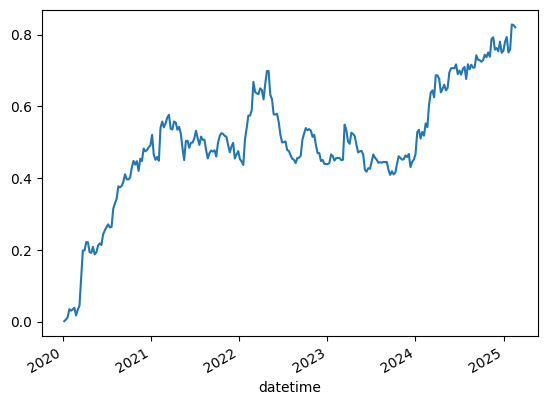

In [17]:
df_8h_returns[(df_8h_returns.index.weekday == 0) & (df_8h_returns.index.hour == 16)]["BTCUSDT"].cumsum().plot()

In [18]:
interval_8h_returns["BTCUSDT"].sort_values(ascending=False).iloc[:5]

weekday    hour
Monday     16      0.003061
Wednesday  12      0.002613
Monday     20      0.002536
Tuesday    0       0.002451
Wednesday  8       0.002068
Name: BTCUSDT, dtype: float64

In [64]:
interval_8h_sr["BTCUSDT"].sort_values(ascending=False).iloc[:5]

weekday    hour
Monday     16      0.129005
Wednesday  8       0.127301
           12      0.124011
Monday     20      0.116254
Tuesday    0       0.115767
Name: BTCUSDT, dtype: float64

In [19]:
interval_8h_returns["ETHUSDT"].sort_values(ascending=False).iloc[:5]

weekday    hour
Monday     20      0.003906
           16      0.003281
Wednesday  20      0.002671
           16      0.002527
Monday     12      0.002413
Name: ETHUSDT, dtype: float64

In [66]:
interval_8h_sr["ETHUSDT"].sort_values(ascending=False).iloc[:5]

weekday   hour
Monday    20      0.145779
          16      0.124765
Saturday  0       0.119536
Tuesday   8       0.110180
          0       0.097349
Name: ETHUSDT, dtype: float64

In [20]:
interval_8h_returns["ADAUSDT"].sort_values(ascending=False).iloc[:5]

weekday    hour
Saturday   0       0.005170
           4       0.003874
Wednesday  20      0.003089
Tuesday    4       0.003075
Wednesday  8       0.002999
Name: ADAUSDT, dtype: float64

In [67]:
interval_8h_sr["ADAUSDT"].sort_values(ascending=False).iloc[:5]

weekday    hour
Saturday   0       0.194888
           4       0.141851
Wednesday  8       0.109354
Tuesday    8       0.106877
           4       0.104864
Name: ADAUSDT, dtype: float64

In [21]:
interval_8h_returns["BNBUSDT"].sort_values(ascending=False).iloc[:5]

weekday    hour
Tuesday    8       0.003138
Wednesday  8       0.002990
           4       0.002921
           0       0.002838
Tuesday    0       0.002729
Name: BNBUSDT, dtype: float64

In [68]:
interval_8h_sr["BNBUSDT"].sort_values(ascending=False).iloc[:5]

weekday    hour
Saturday   0       0.126511
Tuesday    8       0.117058
Wednesday  8       0.115966
Tuesday    0       0.113767
Wednesday  0       0.111506
Name: BNBUSDT, dtype: float64

In [31]:
interval_8h_returns["XRPUSDT"].sort_values(ascending=False).iloc[:5]

weekday   hour
Monday    16      0.010599
          20      0.007432
          12      0.005347
Saturday  12      0.004728
          4       0.003947
Name: XRPUSDT, dtype: float64

In [69]:
interval_8h_sr["XRPUSDT"].sort_values(ascending=False).iloc[:5]

weekday   hour
Monday    16      0.312771
          20      0.258029
Saturday  4       0.199329
Monday    12      0.187947
Saturday  12      0.166389
Name: XRPUSDT, dtype: float64

In [49]:
interval_8h_returns["DOTUSDT"].sort_values(ascending=False).iloc[:5]

weekday   hour
Saturday  0       0.003265
Friday    8       0.002741
          12      0.002705
Saturday  4       0.002665
Tuesday   0       0.002030
Name: DOTUSDT, dtype: float64

In [70]:
interval_8h_sr["DOTUSDT"].sort_values(ascending=False).iloc[:5]

weekday   hour
Saturday  0       0.131393
Friday    12      0.106073
          8       0.098542
Saturday  4       0.083789
Tuesday   0       0.073341
Name: DOTUSDT, dtype: float64

In [56]:
interval_8h_returns["MATICUSDT"].sort_values(ascending=False).iloc[:5]

weekday   hour
Saturday  4       0.003371
Tuesday   0       0.003287
Saturday  0       0.003278
Friday    0       0.002605
          4       0.002558
Name: MATICUSDT, dtype: float64

In [71]:
interval_8h_sr["MATICUSDT"].sort_values(ascending=False).iloc[:5]

weekday   hour
Saturday  0       0.163034
          4       0.119945
Tuesday   0       0.110507
Sunday    8       0.104327
Friday    4       0.087783
Name: MATICUSDT, dtype: float64

In [77]:
import numpy as np
from datetime import timedelta

starting_cash = 100.0

sharpe_optimized_selections = {
    (0, 8): [{"action": "buy", "ticker": "BTCUSDT"}, {"action": "buy", "ticker": "XRPUSDT"}],
    (0, 12): [{"action": "buy", "ticker": "BTCUSDT"}],
    (0, 16): [{"action": "sell", "ticker": "BTCUSDT"}, {"action": "sell", "ticker": "XRPUSDT"}],
    (0, 20): [{"action": "sell", "ticker": "BTCUSDT"}],
    (4, 16): [
        {"action": "buy", "ticker": "ADAUSDT"},
        {"action": "buy", "ticker": "BNBUSDT"},
        {"action": "buy", "ticker": "DOTUSDT"},
        {"action": "buy", "ticker": "MATICUSDT"},
    ],
    (5, 0): [
        {"action": "sell", "ticker": "ADAUSDT"},
        {"action": "sell", "ticker": "BNBUSDT"},
        {"action": "sell", "ticker": "DOTUSDT"},
        {"action": "sell", "ticker": "MATICUSDT"},
    ],
}

trade_selections = {
    (0, 8): [{"action": "buy", "ticker": "BTCUSDT"}, {"action": "buy", "ticker": "XRPUSDT"}],
    (0, 12): [{"action": "buy", "ticker": "ETHUSDT"}],
    (0, 16): [{"action": "sell", "ticker": "BTCUSDT"}, {"action": "sell", "ticker": "XRPUSDT"}],
    (0, 20): [{"action": "sell", "ticker": "ETHUSDT"}],
    (1, 0): [{"action": "buy", "ticker": "BNBUSDT"}],
    (1, 8): [{"action": "sell", "ticker": "BNBUSDT"}],
    (2, 4): [{"action": "buy", "ticker": "BTCUSDT"}],
    (2, 8): [{"action": "buy", "ticker": "ETHUSDT"}],
    (2, 12): [{"action": "sell", "ticker": "BTCUSDT"}],
    (2, 16): [{"action": "sell", "ticker": "ETHUSDT"}],
    (4, 16): [{"action": "buy", "ticker": "ADAUSDT"}, {"action": "buy", "ticker": "DOTUSDT"}],
    (4, 20): [{"action": "buy", "ticker": "MATICUSDT"}],
    (5, 0): [{"action": "sell", "ticker": "ADAUSDT"}, {"action": "sell", "ticker": "DOTUSDT"}],
    (5, 4): [{"action": "sell", "ticker": "MATICUSDT"}],
}

######################### Delete this
# trade_selections = sharpe_optimized_selections
######################### Delete this

unique_stocks = set()
for action_list in trade_selections.values():
    for action_item in action_list:
        unique_stocks.add(action_item["ticker"])
num_unique_stocks = len(unique_stocks)

for time_pair in trade_selections:
    trades = trade_selections[time_pair]
    for trade in trades:
        if trade["action"] == "buy":
            trade["dollar_quantity"] = 2 * starting_cash / num_trades

strat_holdings_data = {
    'cash': [starting_cash],
    'BTCUSDT': [0.0],
    'ETHUSDT': [0.0],
    'ADAUSDT': [0.0],
    'BNBUSDT': [0.0],
    'XRPUSDT': [0.0],
    'DOTUSDT': [0.0],
    'MATICUSDT': [0.0],
}
has_coin_holding = False

held_tickers = set()

for time_index in px_close.index:
    for ticker in strat_holdings_data:
        strat_holdings_data[ticker].append(strat_holdings_data[ticker][-1])
    
    weekday = time_index.weekday()
    hour = time_index.hour
    
    backward_one_week = time_index - timedelta(weeks=1)
    forward_one_week = time_index + timedelta(weeks=1)
    
    for op in trade_selections.get((weekday, hour), []):
        action = op["action"]
        ticker = op["ticker"]
        
        if np.isnan(px_close.loc[time_index, ticker]):
            continue
        elif (forward_one_week in px_close.index) and \
            np.isnan(px_close.loc[forward_one_week, ticker]):
            continue
        elif (backward_one_week in px_close.index) and \
            np.isnan(px_close.loc[backward_one_week, ticker]):
            continue
        elif action == "buy":
            dollar_quantity = op["dollar_quantity"]
            num_shares = dollar_quantity / px_close.loc[time_index, ticker]
            
            strat_holdings_data[ticker][-1] += num_shares
            strat_holdings_data["cash"][-1] -= dollar_quantity
            held_tickers.add(ticker)
        elif action == "sell" and ticker in held_tickers:
            strat_holdings_data["cash"][-1] += px_close.loc[time_index, ticker] * strat_holdings_data[ticker][-1]
            strat_holdings_data[ticker][-1] = 0.0
            held_tickers.remove(ticker)

truncated_strat_holdings_data = {ticker: res[1:] for (ticker, res) in strat_holdings_data.items()}
strat_holdings_df = pd.DataFrame(truncated_strat_holdings_data, index=px_close.index)
strat_holdings_df.head(40)

,cash,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT
datetime,,,,,,,,
2020-01-01 00:00:00,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2020-01-01 04:00:00,83.333333,0.002313,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2020-01-01 08:00:00,66.666667,0.002313,0.127382,0.000000,0.000000,0.000000,0.0,0.0
2020-01-01 12:00:00,83.396988,0.000000,0.127382,0.000000,0.000000,0.000000,0.0,0.0
2020-01-01 16:00:00,100.208871,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2020-01-01 20:00:00,100.208871,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2020-01-02 00:00:00,100.208871,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2020-01-02 04:00:00,100.208871,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2020-01-02 08:00:00,100.208871,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [78]:
def get_net_return(strat_holdings, ret):
    # assume that strat_holdings have already been shifted back in time to avoid look-ahead bias or that 
    # data does not depend on current time point
    gross_ret = (strat_holdings * ret).sum(axis=1)
    
    turnover = (strat_holdings.fillna(0) - strat_holdings.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20
    return gross_ret.subtract(turnover * tcost_bps * 1e-4, fill_value=0)

<Axes: xlabel='datetime'>

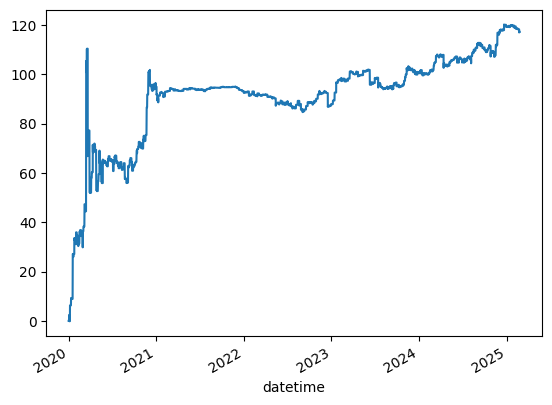

In [79]:
gross_returns = (strat_holdings_df * (px_close / px_close.shift() - 1)).sum(axis=1)
gross_returns.cumsum().plot()

<Axes: xlabel='datetime'>

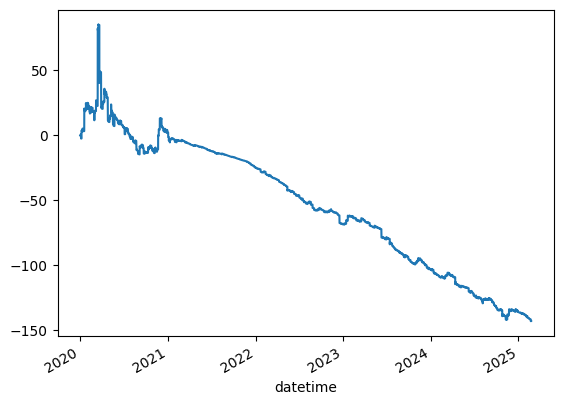

In [80]:
net_returns = get_net_return(strat_holdings_df, px_close / px_close.shift() - 1)
net_returns.cumsum().plot()

In [81]:
net_returns.mean() / net_returns.std() * np.sqrt(365 * 6)

-0.748044405710275

In [30]:
import numpy as np

# (px_close * strat_holdings_df).head(40)
px_close_with_cash = px_close.join(pd.DataFrame(np.ones(len(px_close)), columns=["cash"], index=px_close.index))
px_close_with_cash

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,cash
datetime,,,,,,,,
2020-01-01 00:00:00,7230.71,130.18,0.03308,13.8159,0.19406,NaN,NaN,1.0
2020-01-01 04:00:00,7205.50,130.52,0.03320,13.7648,0.19518,NaN,NaN,1.0
2020-01-01 08:00:00,7195.80,130.84,0.03321,13.7162,0.19358,NaN,NaN,1.0
2020-01-01 12:00:00,7233.02,131.84,0.03357,13.7958,0.19428,NaN,NaN,1.0
2020-01-01 16:00:00,7223.72,131.98,0.03361,13.7270,0.19474,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
2025-02-22 16:00:00,96644.39,2768.63,0.77880,675.6900,2.58720,5.102,NaN,1.0
2025-02-22 20:00:00,96579.75,2762.49,0.77380,667.5200,2.57580,5.052,NaN,1.0
2025-02-23 00:00:00,96493.46,2750.14,0.76880,665.6700,2.55310,5.045,NaN,1.0


In [38]:
ret_with_cash = px_close_with_cash / px_close_with_cash.shift() - 1
# px_close_with_cash * strat_holdings_df
ret_with_cash

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,cash
datetime,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.003487,0.002612,0.003628,-0.003699,0.005771,NaN,NaN,0.0
2020-01-01 08:00:00,-0.001346,0.002452,0.000301,-0.003531,-0.008198,NaN,NaN,0.0
2020-01-01 12:00:00,0.005172,0.007643,0.010840,0.005803,0.003616,NaN,NaN,0.0
2020-01-01 16:00:00,-0.001286,0.001062,0.001192,-0.004987,0.002368,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
2025-02-22 04:00:00,0.001059,0.003763,0.000655,0.005393,0.006774,-0.003116,NaN,0.0
2025-02-22 08:00:00,0.001100,0.018059,0.007728,0.002124,0.001199,-0.007229,NaN,0.0
2025-02-22 12:00:00,0.001087,0.013204,0.006369,0.002440,0.001622,-0.003543,NaN,0.0


In [40]:
gross_ret = (ret_with_cash * strat_holdings_df).head(40)

,ADAUSDT,BNBUSDT,BTCUSDT,DOTUSDT,ETHUSDT,MATICUSDT,XRPUSDT,cash
datetime,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,-0.000000,NaN,NaN,NaN,NaN,0.0
2020-01-01 08:00:00,NaN,NaN,-0.000000,NaN,NaN,NaN,NaN,0.0
2020-01-01 12:00:00,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0
2020-01-01 16:00:00,NaN,NaN,-0.000000,NaN,NaN,NaN,NaN,0.0
2020-01-01 20:00:00,NaN,NaN,-0.000000,NaN,NaN,NaN,NaN,0.0
2020-01-02 00:00:00,NaN,NaN,-0.000000,NaN,NaN,NaN,NaN,0.0
2020-01-02 04:00:00,NaN,NaN,-0.000000,NaN,NaN,NaN,NaN,0.0
2020-01-02 08:00:00,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0


In [24]:
portfolio_ser = strat_holdings_df["BTCUSDT shares"] * px_close["BTCUSDT"] + strat_holdings_df["cash"]
portfolio_ser

datetime
2020-01-01 00:00:00    100.000000
2020-01-01 04:00:00    100.000000
2020-01-01 08:00:00    100.000000
2020-01-01 12:00:00    100.000000
2020-01-01 16:00:00    100.000000
                          ...    
2025-02-22 04:00:00    209.265353
2025-02-22 08:00:00    209.265353
2025-02-22 12:00:00    209.265353
2025-02-22 16:00:00    209.265353
2025-02-22 20:00:00    209.265353
Length: 11274, dtype: float64

<Axes: xlabel='datetime'>

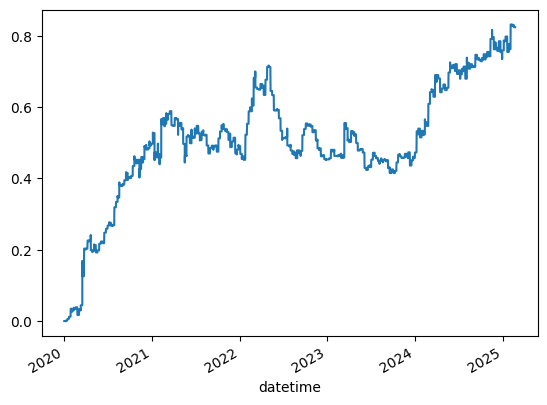

In [25]:
portfolio_returns = (portfolio_ser / portfolio_ser.shift() - 1)
portfolio_returns.cumsum().plot()

In [26]:
portfolio_returns.mean() / portfolio_returns.std()

0.018566874499773994

###########################################################################

Week-to-week change in returns -- probably no pattern